<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/code/05_LDA_TopicModels_GENSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [9]:
%%capture
!pip install pyLDAvis==2.1.2


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data.head()
#data.tail()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [13]:
#from sklearn.datasets import fetch_20newsgroups
#dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes')).data
dataset = data.ABSTRACT
#type(dataset)
dataset = dataset.tolist()
dataset[3]

'Interactive Question Answering (IQA) requires an intelligent agent to interact with a dynamic environment in order to gather information necessary to answer a question. IQA tasks have been proposed as means of training systems to develop language or visual comprehension abilities. To this end, the Question Answering with Interactive Text (QAit) task was created to produce and benchmark interactive agents capable of seeking information and answering questions in unseen environments. While prior work has exclusively focused on IQA as a reinforcement learning problem, such methods suffer from low sample efficiency and poor accuracy in zero-shot evaluation. In this paper, we propose the use of the recently proposed Decision Transformer architecture to provide improvements upon prior baselines. By utilising a causally masked GPT-2 Transformer for command generation and a BERT model for question answer prediction, we show that the Decision Transformer achieves performance greater than or eq

In [14]:
type(dataset)
#fetch_20newsgroups

list

# Preproc

## Limpieza

In [16]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in dataset]


In [19]:
print(texts[100])

['introduce', 'natural', 'logic', 'framework', 'based', 'reinforcement', 'learning', 'introspective', 'revision', 'model', 'samples', 'rewards', 'specific', 'reasoning', 'paths', 'policy', 'gradient', 'introspective', 'revision', 'algorithm', 'modifies', 'intermediate', 'symbolic', 'reasoning', 'steps', 'discover', 'operations', 'well', 'leverages', 'external', 'knowledge', 'alleviate', 'spurious', 'reasoning', 'training', 'inefficiency', 'framework', 'supported', 'properly', 'designed', 'local', 'relation', 'models', 'avoid', 'input', 'entangling', 'helps', 'ensure', 'interpretability', 'proof', 'paths', 'proposed', 'model', 'interpretability', 'shows', 'superior', 'capability', 'monotonicity', 'inference', 'systematic', 'generalization', 'interpretability', 'compared', 'previous', 'models', 'existing', 'datasets']


## Ajuste para LDA

In [20]:
dictionary = corpora.Dictionary(texts)  #crea diccionario asinandole un indice numerico a cada palabra
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)  #filtra tokens q aparencen en menos de 10 documentos y en mas de la mitad de los documentos.
print(len(dictionary))

48159
10142


In [21]:
corpus = [dictionary.doc2bow(text) for text in texts]  #el bow cuenta cantidad de apariciones de cada palabra del diccionario

## LDA

In [22]:
semilla = 420

In [24]:
lsamodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary  #25
                    # , random_seed = semilla
                    )

In [25]:
lsamodel.print_topics(10,4)


[(0, '0.296*"model" + 0.284*"language" + 0.261*"models" + 0.226*"data"'),
 (1, '-0.681*"de" + -0.280*"la" + -0.280*"des" + -0.244*"les"'),
 (2,
  '-0.457*"translation" + 0.457*"model" + -0.333*"language" + 0.262*"models"'),
 (3,
  '0.699*"language" + -0.437*"translation" + 0.200*"models" + -0.194*"system"'),
 (4,
  '0.469*"translation" + 0.410*"model" + 0.305*"models" + 0.249*"language"'),
 (5, '-0.800*"data" + 0.265*"word" + -0.240*"training" + 0.156*"language"'),
 (6, '-0.578*"word" + 0.359*"task" + -0.257*"embeddings" + 0.251*"system"'),
 (7, '-0.636*"model" + 0.601*"models" + -0.190*"language" + 0.149*"tasks"'),
 (8, '-0.593*"task" + -0.264*"word" + -0.244*"system" + 0.237*"knowledge"'),
 (9, '-0.455*"corpus" + -0.427*"models" + 0.346*"knowledge" + 0.250*"tasks"')]

In [31]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                    )
# LDA hecho con el doc2bow (bolsa de palabras comun)  (NO con TF-IDF)

In [32]:
ldamodel.print_topics(10, 8)

[(0,
  '0.032*"word" + 0.021*"languages" + 0.018*"words" + 0.014*"language" + 0.012*"paper" + 0.011*"lexical" + 0.010*"semantic" + 0.010*"english"'),
 (1,
  '0.107*"translation" + 0.046*"machine" + 0.035*"system" + 0.031*"mt" + 0.022*"systems" + 0.017*"language" + 0.016*"speech" + 0.016*"parallel"'),
 (2,
  '0.021*"semantic" + 0.020*"parsing" + 0.019*"syntactic" + 0.014*"annotation" + 0.014*"dependency" + 0.013*"structure" + 0.013*"relations" + 0.012*"grammar"'),
 (3,
  '0.014*"language" + 0.013*"corpus" + 0.010*"data" + 0.009*"paper" + 0.007*"research" + 0.007*"system" + 0.007*"annotation" + 0.006*"evaluation"'),
 (4,
  '0.040*"task" + 0.028*"system" + 0.022*"features" + 0.017*"paper" + 0.015*"model" + 0.012*"results" + 0.011*"shared" + 0.010*"classification"'),
 (5,
  '0.080*"de" + 0.034*"des" + 0.034*"la" + 0.028*"les" + 0.025*"et" + 0.022*"un" + 0.022*"le" + 0.021*"une"'),
 (6,
  '0.022*"sentiment" + 0.016*"social" + 0.015*"analysis" + 0.014*"news" + 0.013*"detection" + 0.013*"medi

In [33]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text.lower()))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(3, 0.47888765), (4, 0.024003707), (7, 0.39608443), (8, 0.017575355), (9, 0.07659768)]
0.014*"language" + 0.013*"corpus" + 0.010*"data" + 0.009*"paper" + 0.007*"research" + 0.007*"system" + 0.007*"annotation" + 0.006*"evaluation" + 0.006*"text" + 0.006*"present"


In [34]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.125550 -0.000043       1        1  26.143486
3     -0.069832  0.048141       2        1  19.844388
9     -0.106080 -0.044346       3        1  11.729938
0     -0.096324 -0.008878       4        1   9.741767
4     -0.108936 -0.094646       5        1   6.937067
5      0.465217 -0.216215       6        1   6.130813
6     -0.053802  0.028491       7        1   6.004640
2     -0.021875  0.062173       8        1   5.455043
1     -0.097533 -0.136385       9        1   4.739524
8      0.214716  0.361708      10        1   3.273333, topic_info=             Term          Freq         Total Category  logprob  loglift
1518  translation  13088.000000  13088.000000  Default  30.0000  30.0000
4831           de  12668.000000  12668.000000  Default  29.0000  29.0000
118        system  13344.000000  13344.000000  Default  28.0000  28.0000
234          task  14632.000000  14632.000000  Default  27.0000  27.0000
419       machine   7381.000000   7381.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
267    properties    378.885666   1166.101569  Topic10  -5.4059   2.2952
903       whether    357.325022   1434.137488  Topic10  -5.4644   2.0297
644         words    422.001492   6328.029332  Topic10  -5.2981   0.7116
1309     patterns    338.207313   1367.780141  Topic10  -5.5194   2.0221
417   investigate    332.629618   1886.551330  Topic10  -5.5361   1.6839

[683 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1184      1  0.998477  abstractive
176       1  0.545915     accuracy
176       2  0.002364     accuracy
176       3  0.023643     accuracy
176       4  0.110413     accuracy
...     ...       ...          ...
5977      2  0.998188     workflow
4552      4  0.996242          wsd
7876      2  0.996524          xml
3479      2  0.217944         year
3479      9  0.780735         year

[1521 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 10, 1, 5, 6, 7, 3, 2, 9])

topicos de sklearn


1 embedings
6 sequence 2 sequence
3 herramientas - implementacion
7 palabras en otro idioma? articulos? parte de nombres?
9 emotions analysis (hater etc)
5 computation and social sceince,

promediar la distribucion para todos los años y ver como se distribuyo para cada año y decir este año el topico no fue tan frecuente

In [ ]:
lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(10,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(10,formatted=False)]

In [ ]:
ldatopics[0]

['information',
 'text',
 'analysis',
 'documents',
 'social',
 'sentiment',
 'news',
 'users',
 'event',
 'extraction']

In [ ]:
lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

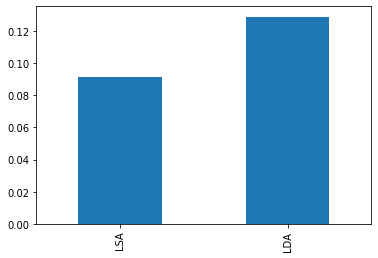

In [ ]:
df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [ ]:
df_lda.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
5,5,0.555164,"[de, des, la, les, et, un, le, une, nous, en]"
6,6,0.168902,"[word, semantic, words, lexical, syntactic, pa..."
9,9,0.135183,"[translation, machine, languages, language, da..."
4,4,0.106065,"[speech, parser, grammar, errors, error, ontol..."
1,1,0.089009,"[evaluation, human, results, text, automatic, ..."
2,2,0.079501,"[model, models, learning, propose, performance..."
8,8,0.073562,"[question, dialogue, system, knowledge, questi..."
7,7,0.029253,"[corpus, language, annotation, paper, data, re..."
3,3,0.026759,"[task, system, paper, model, features, results..."
0,0,0.02665,"[information, text, analysis, documents, socia..."
